In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import xroms
from WaterMassProperties import *

In [2]:
# ROMS file
romsfile = "../../../Downloads/nk.nc"

In [3]:
# Open with xarray and make xroms object
ds = xr.open_dataset(romsfile)
ds, xgrid = xroms.roms_dataset(ds)

In [4]:
# Make subset
ds = ds.cf.isel(X=slice(0,1500), Y=slice(500,1000))

In [5]:
maxdepth = -1000.0
resolution = 400
tu, z = tad(ds.salt.values, ds.temp.values, ds.z_rho.values, maxdepth, resolution)

Text(0, 0.5, 'Depth [m]')

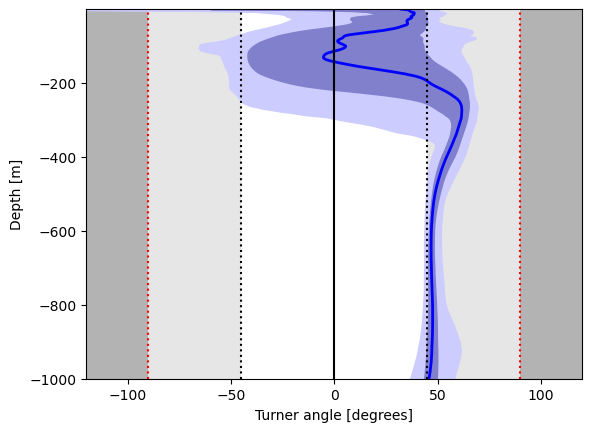

In [7]:
# Plot Turner angles
plt.subplot(1,1,1)

plt.axvspan(-120, -90, facecolor='0.7')
plt.axvspan(-90, -45, facecolor='0.9')
plt.axvspan(45, 90, facecolor='0.9')
plt.axvspan(90, 120, facecolor='0.7')

plt.fill_betweenx(z, tu[:,0], tu[:,4], color=[0.8, 0.8, 1.0]) 
plt.fill_betweenx(z, tu[:,1], tu[:,3], color=[0.5, 0.5, 0.8]) 
plt.plot(tu[:,2], z, 'b-', linewidth = 2)

plt.plot([0,0],[maxdepth, 0],'k-')
plt.plot([-45,-45],[maxdepth, 0],'k:')
plt.plot([45,45],[maxdepth, 0],'k:')
plt.plot([-90,-90],[maxdepth, 0],'r:')
plt.plot([90,90],[maxdepth, 0],'r:')

plt.xlim((-120, 120))
plt.ylim((maxdepth, -1))
plt.xlabel('Turner angle [degrees]')
plt.ylabel('Depth [m]')